In [118]:
import numpy as np
import pandas as pd 
from scipy.stats import norm
import matplotlib.pyplot as plt

Fama French factors are quantile-based, but most fundamental factor models use regression techniques. We can estimate the value of a unit factor return in a regression-based model using returns within quantile buckets by constructing unit exposure long-short portfolios which are neutral to the market, with weights equal to the expected factor exposure within the quantile bucket.

The below calculates the expected factor exposures in each bucket of returns

In [65]:
# Calculate the average exposure in a set of quantiles
def exp_value_quantile(quantile, no_quantiles):
    
    # Generate the expected value of exposures within a given quantile bucket
    return norm.expect(lambda x: x, lb=norm.ppf((quantile-1)/no_quantiles), ub=norm.ppf(quantile/no_quantiles)) * no_quantiles

# Expected value of exposures within quintile buckets
def get_quantiles(quantiles):
    exp_quintiles = pd.DataFrame(index=range(1,quantiles+1), columns=['exp_value'])
    for x in exp_quintiles.index:
        exp_quintiles.loc[x,'exp_value'] = exp_value_quantile(x, quantiles)
        
    return exp_quintiles

quantiles = 5
get_quantiles(quantiles)

,exp_value
1,-1.39981
2,-0.531903
3,0.0
4,0.531903
5,1.39981


In [97]:
ff_data = {
    'size' : ('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_ME_CSV.zip', 7),
    'momentum' : ('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Momentum_Factor_CSV.zip', 11),
    'beta' : ('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_BETA_CSV.zip', 9)
}

#### Size Factor

Fama French size gives a number of different options to choose from
We choose the equal-weighted quintile returns with which to calculate our factor return 

The annual average size factor return is 1.35%
The annual size factor standard deviation is 5.71%


<Axes: title={'center': 'Size Factor Return'}>

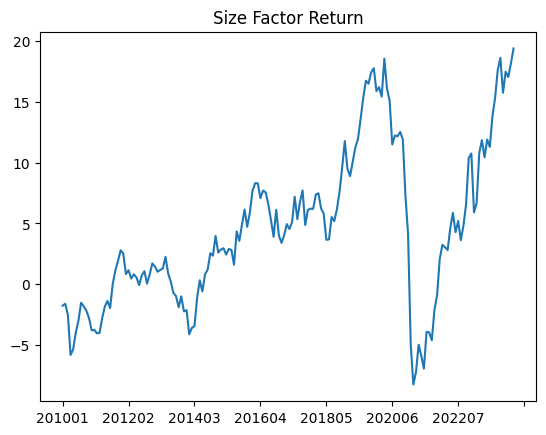

In [116]:
factor = 'size'

ff_factor_data = pd.read_csv(ff_data[factor][0], compression='zip', header=ff_data[factor][1], index_col=0).loc['  Equal Weight Returns -- Monthly': '  Value Weight Returns -- Annual from January to December'].iloc[2:-1]

min_year = 2010

beta_factor_return = (
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Lo 20'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[1,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Qnt 2'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[2,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Qnt 4'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[4,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Hi 20'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[5,'exp_value']
) / np.sum(np.abs(get_quantiles(5)), axis=0)['exp_value']

print('The annual average size factor return is {:.2f}%'.format(beta_factor_return.mean()*12))
print('The annual size factor standard deviation is {:.2f}%'.format(beta_factor_return.std()*(12**0.5)))
beta_factor_return.cumsum().plot(title='Size Factor Return')

#### Beta Factor

Fama French beta gives a number of different options to choose from
We choose the equal-weighted quintile returns with which to calculate our factor return 

The annual average beta factor return is 0.11%
The annual beta factor standard deviation is 6.30%


<Axes: title={'center': 'Beta Factor Return'}>

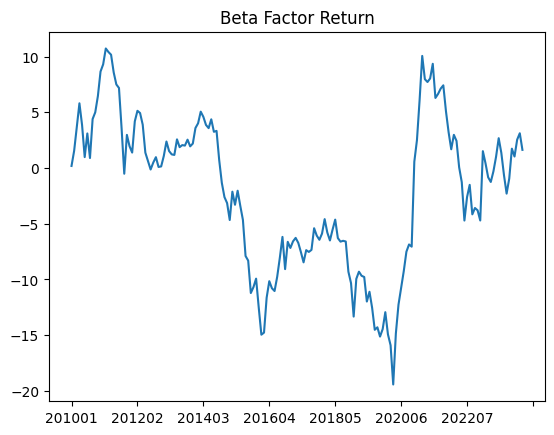

In [112]:
factor = 'beta'

ff_factor_data = pd.read_csv(ff_data[factor][0], compression='zip', header=ff_data[factor][1], index_col=0).loc['  Equal Weighted Returns -- Monthly': '  Value Weighted Returns -- Annual from January to December'].iloc[2:-1]

min_year = 2010

beta_factor_return = (
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Lo 20'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[1,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Qnt 2'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[2,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Qnt 4'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[4,'exp_value'] +
    ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Hi 20'].dropna().apply(lambda s: float(s.strip())) * get_quantiles(5).loc[5,'exp_value']
) / np.sum(np.abs(get_quantiles(5)), axis=0)['exp_value']

print('The annual average beta factor return is {:.2f}%'.format(beta_factor_return.mean()*12))
print('The annual beta factor standard deviation is {:.2f}%'.format(beta_factor_return.std()*(12**0.5)))
beta_factor_return.cumsum().plot(title='Beta Factor Return')

#### Momentum Factor

Fama French momentum is a long/short portfolio of above-median stocks minus below-median stocks
As such, the correct denominator is the gross expected return of a two quintile 

The annual average momentum factor return is 1.69%
The annual momentum factor standard deviation is 7.81%


<Axes: title={'center': 'Momentum Factor Return'}>

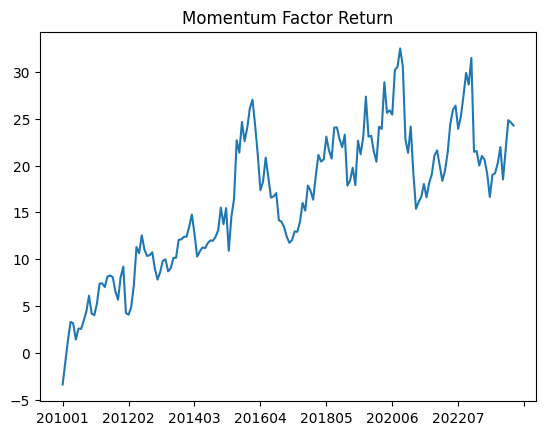

In [120]:
factor = 'momentum'

ff_factor_data = pd.read_csv(ff_data[factor][0], compression='zip', header=ff_data[factor][1], index_col=0)

min_year = 2010

mom_factor_return = ff_factor_data.loc[f'{min_year}01':'Annual Factors:', 'Mom   '].dropna().apply(lambda s: float(s.strip())) / np.sum(np.abs(get_quantiles(2)), axis=0)['exp_value']

print('The annual average momentum factor return is {:.2f}%'.format(mom_factor_return.mean()*12))
print('The annual momentum factor standard deviation is {:.2f}%'.format(mom_factor_return.std()*(12**0.5)))
mom_factor_return.cumsum().plot(title='Momentum Factor Return')
